In [1]:
import os
import glob
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fileloc = r"../dataFolders/DLCtrackingResults/"
filelist = glob.glob(fileloc + '*Stats.csv')

In [46]:
uber_df = pd.DataFrame()
for file in filelist:
    df = pd.read_csv(file)
    name = pd.Series(index = df.index, data = os.path.basename(file)[:-32])
    df['mothID'] = name
    uber_df = uber_df.append(df)

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [47]:
uber_df.head()

,Annotations,FramesInView,MothIN,MothOut,Unnamed: 0,Unnamed: 0.1,max,mean,median,min,mothID
0,NM,74,2665,2739,0,0,0.069037,0.001264,0.000017,0.000001,c-10_m13
1,FN,193,14042,14235,1,1,1.000000,0.935518,1.000000,0.000001,c-10_m13
2,FN,195,15013,15208,2,2,1.000000,0.743946,1.000000,0.000001,c-10_m13
3,HO,33,15276,15309,3,3,0.999998,0.227104,0.000011,0.000001,c-10_m13
4,FN,895,17643,18538,4,4,1.000000,0.797914,0.999999,0.000001,c-10_m13


In [ ]:
# len(uber_df), len(df)

In [ ]:
# uber_df.FramesInView = uber_df.FramesInView/100

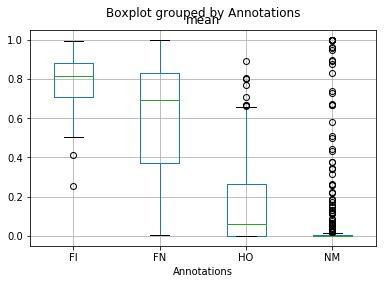

In [48]:
uber_df.boxplot(column=['mean'], by='Annotations')
plt.show()

In [49]:
# uber_df.boxplot(column=['median'], by='Annotations')

In [8]:
# fig, axes = plt.subplots()

# axes.violinplot(dataset = [uber_df[uber_df.Annotations == 'FI']["median"].values,
#                            uber_df[uber_df.Annotations == 'FN']["median"].values,
#                            uber_df[uber_df.Annotations == 'HO']["median"].values,
#                            uber_df[uber_df.Annotations == 'NM']["median"].values])

In [50]:
# sns.swarmplot(x="Annotations", y="median", data=uber_df)

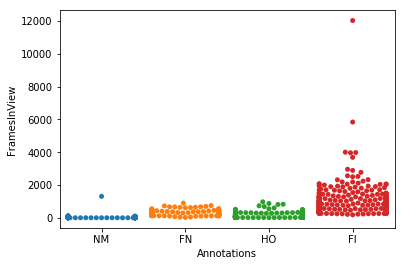

In [51]:
sns.swarmplot(x = 'Annotations', y = 'FramesInView', data=uber_df)

(-0.2, 500)

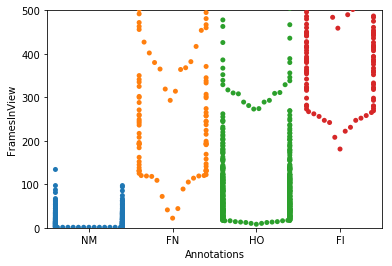

In [52]:
sns.swarmplot(x = 'Annotations', y = 'FramesInView', data=uber_df)
plt.ylim([-0.2, 500])

In [ ]:
# sns.swarmplot(x = 'Annotations', y = 'FramesInView', data=uber_df)
# plt.ylim([-0.2, 2000])

In [53]:
filtered_uber = uber_df[uber_df['mean'] > 0.4].copy()

(-0.2, 500)

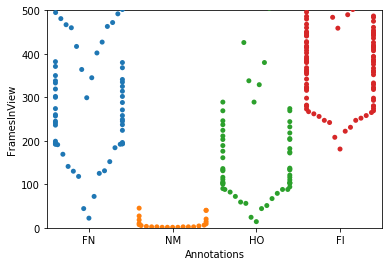

In [56]:
sns.swarmplot(x = 'Annotations', y = 'FramesInView', data=filtered_uber)
plt.ylim([-0.2, 500])

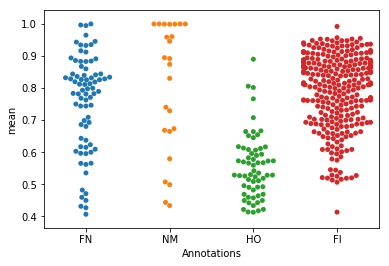

In [58]:
sns.swarmplot(x = 'Annotations', y = 'mean', data=filtered_uber)
# plt.ylim([-0.2, 500])

In [73]:
filt_uber = filtered_uber[filtered_uber.FramesInView > 150]

In [ ]:
# sns.swarmplot(x="Annotations", y="median", data=filtered_uber)

In [ ]:
# len(filtered_uber), len(filtered_uber[filtered_uber['mean'] > 0.4]), len(filtered_uber[filtered_uber['median'] > 0.5])

In [ ]:
# groups = filtered_uber.groupby('Annotations')
# for annot, df in groups:
#     print(annot + str(len(df[df['mean'] > 0.4])))

In [ ]:
# groups = filtered_uber.groupby('Annotations')
# for annot, df in groups:
#     print(annot + str(len(df[df['median'] > 0.4])))

## figure out stats on between trials and merge trials

In [ ]:
# df = pd.read_csv(filelist[4])
# # del df['Unnamed']
# # df.head()

In [ ]:
# del df['Unnamed: 0']
# del df['Unnamed: 0.1']

In [ ]:
# frames_inbetween =  df.MothIN.values[1:] - df.MothOut.values[0:-1]
# frames_inbetween = frames_inbetween.astype(np.float64)
# frames_inbetween = np.insert(frames_inbetween, 0, np.nan, axis = 0)
# df['frames_inbetween'] = frames_inbetween

In [ ]:
# df.head()

In [ ]:
colors = {'FI':'red', 'FN':'blue', 'HO':'green', 'NM':'black'}
plt.scatter(df.index, df.FramesInView/100, c=df['Annotations'].apply(lambda x: colors[x]))
plt.ylim([-2, 3])

# plt.ylim([-2, 3])

In [ ]:
colors = {'FI':'red', 'FN':'blue', 'HO':'green', 'NM':'black'}
plt.scatter(df.index[1:], df.frames_inbetween[1:], c=df['Annotations'].apply(lambda x: colors[x]))
plt.ylim([-20, 2500])

## merge tracks together

In [74]:
uber_new_df = pd.DataFrame()
for name, df in filt_uber.groupby('mothID'):
    frames_inbetween =  df.MothIN.values[1:] - df.MothOut.values[:-1]
    frames_inbetween = frames_inbetween.astype(np.float64)
    frames_inbetween = np.insert(frames_inbetween, 0, np.nan, axis = 0)
    df['frames_inbetween'] = frames_inbetween
    df.index = np.arange(0, len(df))
    uber_new_df = uber_new_df.append(df)

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


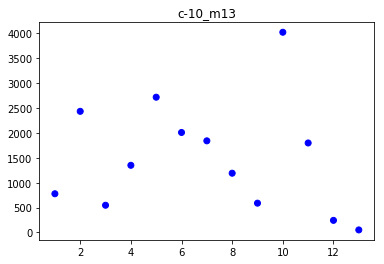

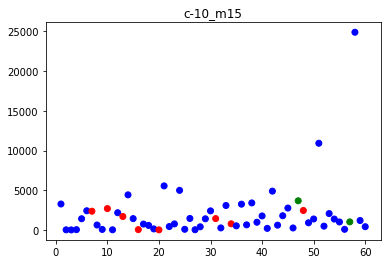

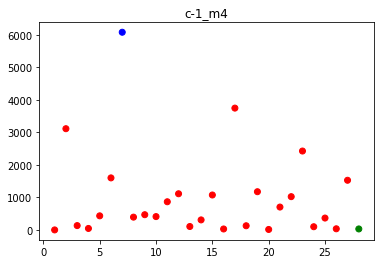

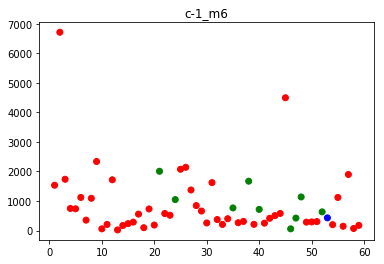

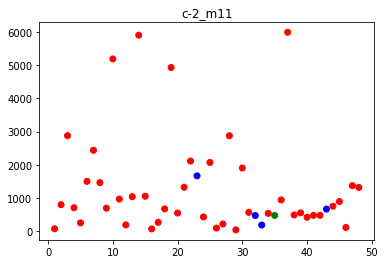

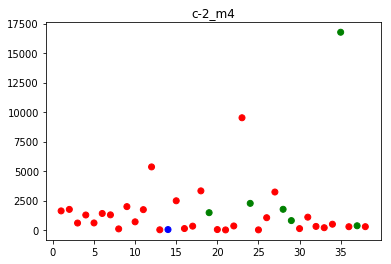

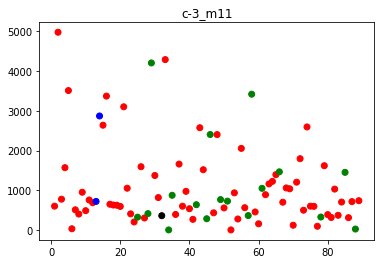

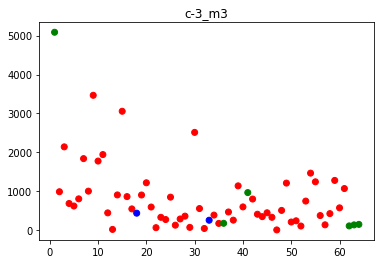

In [69]:
colors = {'FI':'red', 'FN':'blue', 'HO':'green', 'NM':'black'}
for name, df in uber_new_df.groupby('mothID'):
    plt.scatter(df.index[1:], df.frames_inbetween[1:], c=df['Annotations'].apply(lambda x: colors[x]))
    plt.title(name)
#     plt.legend()
    plt.show()

In [75]:
new_df = pd.DataFrame()
for name, df in uber_new_df.groupby('mothID'):
# df = uber_df[uber_df.mothID == 'c-10_m15'].copy()
    print(name)
    idx = df[df['frames_inbetween'] <= 600].index.values
    print(idx)
    if len(idx)>1:
        conseq = idx[:-1] - idx[1:]
        for c, ind in zip(conseq, idx[:-1]):
            if c is -1:
                new_val = df.loc[idx+1,'MothOut'].values
                df.loc[idx- 1, 'MothOut'] = new_val 
            else:
                new_val = df.loc[idx,'MothOut'].values
                df.loc[idx- 1, 'MothOut'] = new_val 
        if c != -1:
            new_val = df.loc[idx[-1],'MothOut']
            df.loc[idx[-1]- 1, 'MothOut'] = new_val
    else:
        new_val = df.loc[idx,'MothOut'].values
        df.loc[idx- 1, 'MothOut'] = new_val

    df = df.drop(idx, axis = 0)
    new_df = new_df.append(df)

c-10_m13
[ 3  9 12]
c-10_m15
[ 2  3  8 10 15 17 18 19 21 25 29 32 38 43 49 53 57]


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


c-1_m4
[ 1  3  4  5  7  8  9 12 13 15 17 19 23 24 25 27]
c-1_m6
[ 7 10 11 13 14 15 16 17 18 20 22 23 30 32 33 35 37 39 40 41 42 44 45 47
 48 50 51 53 55]
c-2_m11
[ 1  5 12 16 17 20 24 26 27 29 31 32 33 37 38 39 40 41 45]
c-2_m4
[ 3  8 13 14 16 17 19 20 21 23 27 29 30 33]
c-3_m11
[ 6  7  8 10 19 22 23 24 26 27 31 33 35 39 44 48 50 52 53 55 56 66 69 72
 73 75 76 78 81 83]
c-3_m3
[12 13 17 18 21 22 23 24 26 27 28 29 31 32 33 34 35 36 37 38 40 43 44 45
 46 47 48 50 51 52 56 57 58 60 62 63]


In [71]:
direc = '../dataFolders/Output/Step5_FilesWith_TrueTrialAnd_ProboscisDetect/'
list = glob.glob(direc + '*.csv')

In [76]:
for name, df in new_df.groupby('mothID'):
    print(name + ' ' + str(len(df)))
    
    matched= [file for file in list if name in file]
    df_old = pd.read_csv(matched[0])
    print(name + ' SVM ' + str(len(df_old)))

c-10_m13 10
c-10_m13 SVM 9
c-10_m15 41
c-10_m15 SVM 47
c-1_m4 12
c-1_m4 SVM 28
c-1_m6 27
c-1_m6 SVM 59
c-2_m11 29
c-2_m11 SVM 47
c-2_m4 20
c-2_m4 SVM 35
c-3_m11 54
c-3_m11 SVM 89
c-3_m3 28
c-3_m3 SVM 67


In [ ]:
shape = ['c-1_', 'c-2_', 'c-3_', 'c-10_']
f1, ax = plt.subplots(2,2, sharex = True, sharey = True, figsize = (20,6))
ax = ax.ravel()

i = 0
for c in shape:
    names = [moth for moth in new_df.mothID.unique() if c in moth]
    for names in names:
        df = new_df[new_df.mothID == names]
        ax[i].plot(np.arange(0,len(df)), (df.MothOut - df.MothIN)/100, 'o')
        ax[i].set_title(names)
        print(names)
    i=+1


In [ ]:
new_df.mothID.unique()